**Theoretical Questions:**


1. **What is unsupervised learning in the context of machine learning?**

**Answer:**
Unsupervised learning is a type of machine learning where the algorithm is provided **only input data** without labeled responses. The goal is to uncover **hidden patterns, groupings, or structures** in the data.
Key tasks:

* **Clustering** (e.g., K-Means, DBSCAN)
* **Dimensionality Reduction** (e.g., PCA, t-SNE)

2. **How does K-Means clustering algorithm work?**

**Answer:**
K-Means is a centroid-based clustering algorithm. It works as follows:

1. Choose the number of clusters, **K**
2. Randomly initialize **K centroids**
3. Assign each data point to the **nearest centroid**
4. Recompute centroids as the **mean** of the points in each cluster
5. Repeat steps 3–4 until convergence (centroids don’t change significantly)


3. **Explain the concept of a dendrogram in hierarchical clustering.**

**Answer:**
A **dendrogram** is a tree-like diagram that visualizes the process of **hierarchical clustering**. It shows how data points (or clusters) are **merged step-by-step** based on their similarity.
You can cut the dendrogram at a chosen level to determine the **number of clusters**.


4. **What is the main difference between K-Means and Hierarchical Clustering?**

**Answer:**

* **K-Means** requires the number of clusters **K** to be specified in advance; it is **partitional** and iterative.
* **Hierarchical Clustering** builds a **tree of clusters** and does not need a predefined number of clusters. It’s **deterministic** and works via **agglomeration or division**.


5. **What are the advantages of DBSCAN over K-Means?**

**Answer:**

* **No need to specify number of clusters** beforehand
* Can detect **clusters of arbitrary shape**
* Can handle **noise and outliers** effectively
* Works better on datasets with **uneven densities**

6. **When would you use Silhouette Score in clustering?**

**Answer:**
Silhouette Score is used to **evaluate clustering performance**. It measures how well a data point fits within its own cluster compared to others.

* **+1**: well-clustered
* **0**: boundary point
* **-1**: likely misclassified
  It helps in choosing the **optimal number of clusters**.


7. **What are the limitations of Hierarchical Clustering?**

**Answer:**

* **Scales poorly** to large datasets (O(n²) complexity)
* **Sensitive to noise and outliers**
* Once merged/split, steps **cannot be undone**
* Choice of **linkage method** can drastically change results

8. **Why is feature scaling important in clustering algorithms like K-Means?**

**Answer:**
K-Means uses **Euclidean distance**, so features with **larger scales dominate** clustering. Scaling (e.g., Min-Max, Standardization) ensures:

* **Equal weight** to all features
* More **accurate distance calculations**
* Better clustering results

9. **How does DBSCAN identify noise points?**

**Answer:**
DBSCAN classifies a point as **noise** if:

* It is not a **core point** (i.e., does not have enough neighbors within `eps`)
* It is **not reachable** from any core point
  These points don’t belong to any cluster.

10. **Define inertia in the context of K-Means.**

**Answer:**
**Inertia** is the **sum of squared distances** from each point to its cluster’s centroid.
It measures how **tight** the clusters are.
Lower inertia = better compactness (but doesn’t always mean better clustering overall).

11. **What is the elbow method in K-Means clustering?**

**Answer:**
A technique to find the **optimal number of clusters (K)**.
Steps:

1. Run K-Means for a range of K values
2. Plot K vs. Inertia
3. Identify the **"elbow" point** — where inertia stops decreasing significantly
   This point balances **complexity vs. performance**.


12. **Describe the concept of "density" in DBSCAN.**

**Answer:**
In DBSCAN, **density** is defined by:

* `eps`: neighborhood radius
* `minPts`: minimum points to form a dense region
  A point is **core** if ≥ `minPts` neighbors exist within `eps`.
  Clusters are formed by **connecting dense regions**.

13. **Can hierarchical clustering be used on categorical data?**

**Answer:**
Yes, but you must use a suitable **distance metric** like:

* **Hamming distance**
* **Jaccard distance**
  And some variations (like **hierarchical agglomerative clustering**) may support categorical data natively through **Gower’s distance**.


14. **What does a negative Silhouette Score indicate?**

**Answer:**
It indicates that a sample is likely assigned to the **wrong cluster** — it is **closer to another cluster** than to its own.
This suggests **poor clustering** for that sample.


15. **Explain the term "linkage criteria" in hierarchical clustering.**

**Answer:**
**Linkage criteria** define how the **distance between clusters** is calculated when merging:

* **Single linkage**: minimum distance between points
* **Complete linkage**: maximum distance
* **Average linkage**: average distance
* **Ward’s method**: minimizes within-cluster variance

16. **Why might K-Means perform poorly on data with varying cluster sizes or densities?**

**Answer:**
K-Means assumes:

* Clusters are **spherical**
* All clusters have **similar density and size**
  In real-world data, clusters may be **elongated or imbalanced**, leading K-Means to **misclassify or split** them incorrectly.

17. **What are the core parameters in DBSCAN, and how do they influence clustering?**

**Answer:**

* **`eps`**: Neighborhood radius
* **`minPts`**: Minimum points in a neighborhood to be considered dense
  They define:
* How many points are **core points**
* How clusters **expand**
* What is labeled as **noise**

18. **How does K-Means++ improve upon standard K-Means initialization?**

**Answer:**
K-Means++ selects **initial centroids more strategically**:

* First centroid chosen randomly
* Next centroids chosen **with probability proportional to distance** from existing centroids
  This reduces chances of poor initialization and speeds up convergence.


19. **What is agglomerative clustering?**

**Answer:**
Agglomerative clustering is a **bottom-up** hierarchical method.

* Starts with **each point as its own cluster**
* Iteratively **merges the closest clusters**
* Continues until one big cluster (or desired number of clusters)

20. **What makes Silhouette Score a better metric than just inertia for model evaluation?**

**Answer:**

* **Inertia** only measures **intra-cluster distance**
* **Silhouette Score** considers **both intra-cluster cohesion and inter-cluster separation**
  This makes it a **more balanced** and **interpretable** metric for cluster quality

Practical Question :

Solution 21:

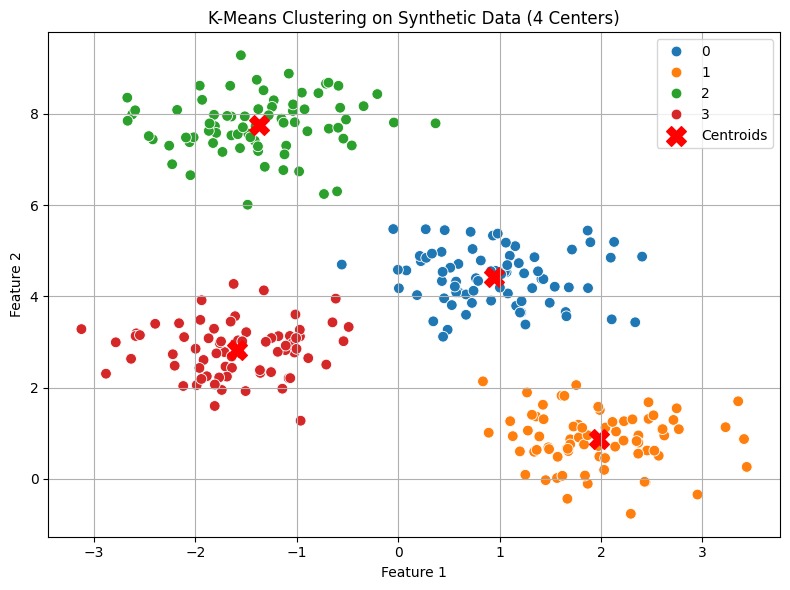

In [2]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='tab10', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data (4 Centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


solution 22:

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


Solution 23:

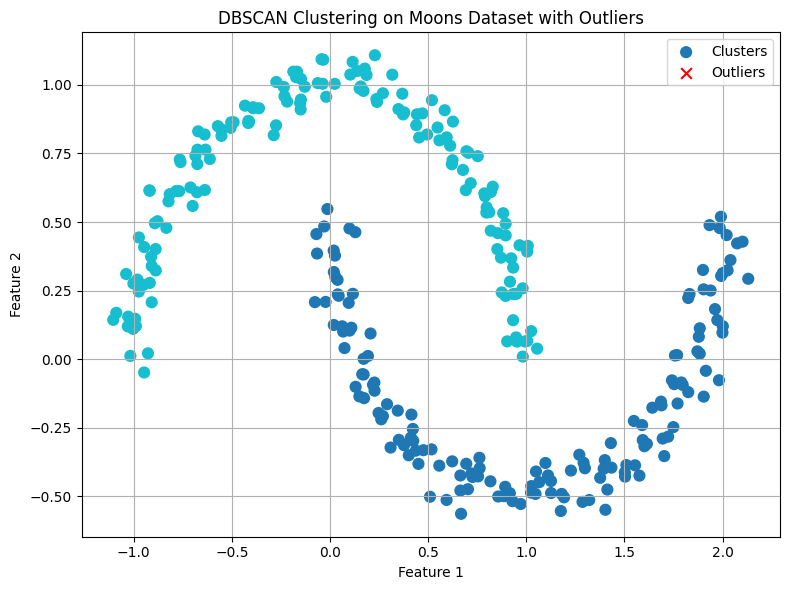

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic moon-shaped data
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core and noise points
core_samples_mask = labels != -1
noise_mask = labels == -1


plt.figure(figsize=(8, 6))
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], c=labels[core_samples_mask], cmap='tab10', s=60, label='Clusters')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', marker='x', s=60, label='Outliers')
plt.title("DBSCAN Clustering on Moons Dataset with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Solution 24:

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)


unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


solution 25:

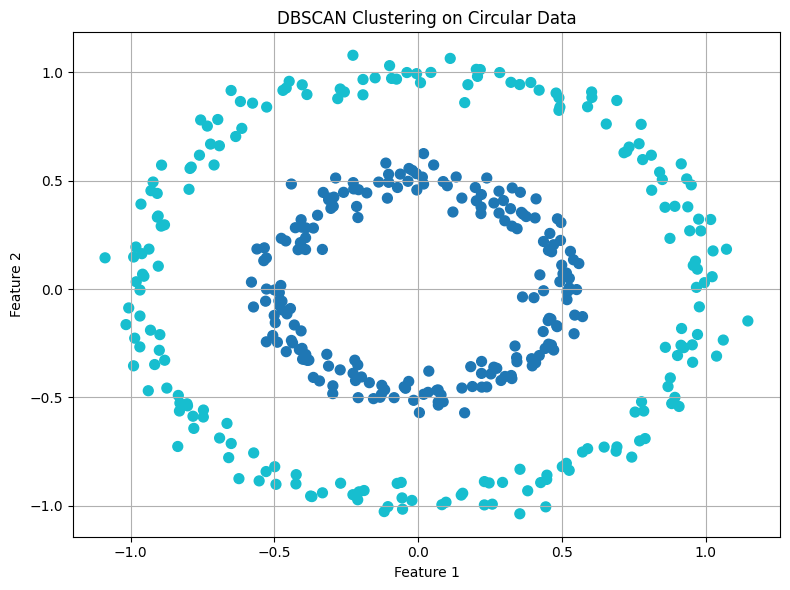

In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the clusters and noise
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN Clustering on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 26:

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd


data = load_breast_cancer()
X = data.data


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids (after MinMax Scaling):")
print(pd.DataFrame(centroids, columns=data.feature_names))


Cluster Centroids (after MinMax Scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst f

solution 27 :

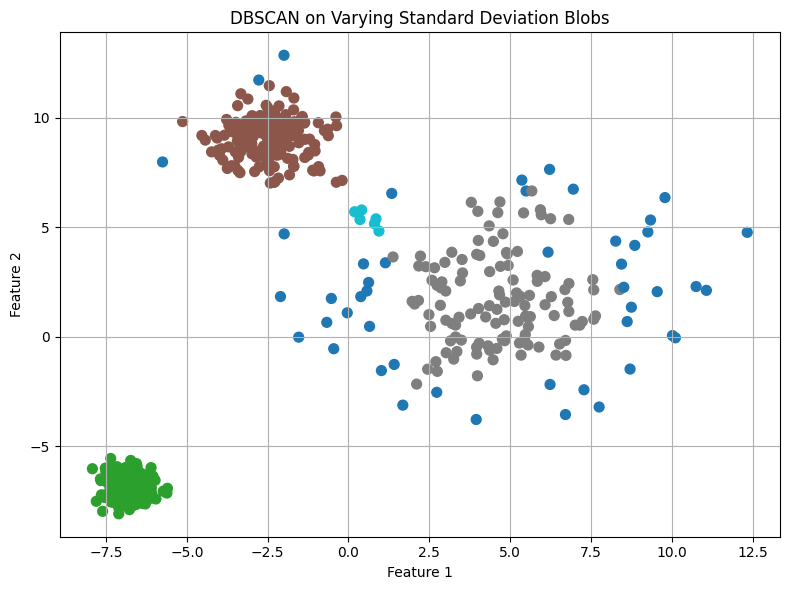

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create synthetic data with varying std deviations
X, y = make_blobs(n_samples=500,
                  centers=3,
                  cluster_std=[1.0, 2.5, 0.5],
                  random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN on Varying Standard Deviation Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 28 :

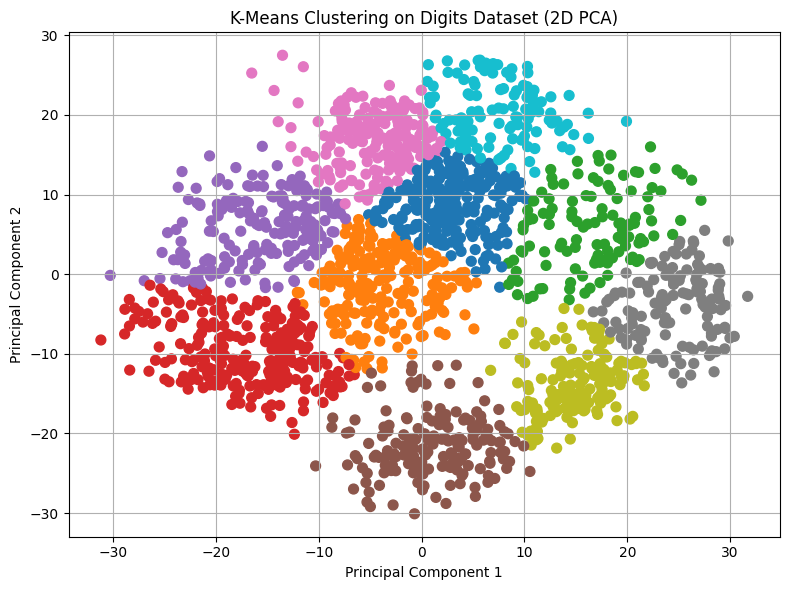

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K-Means Clustering on Digits Dataset (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 29 :

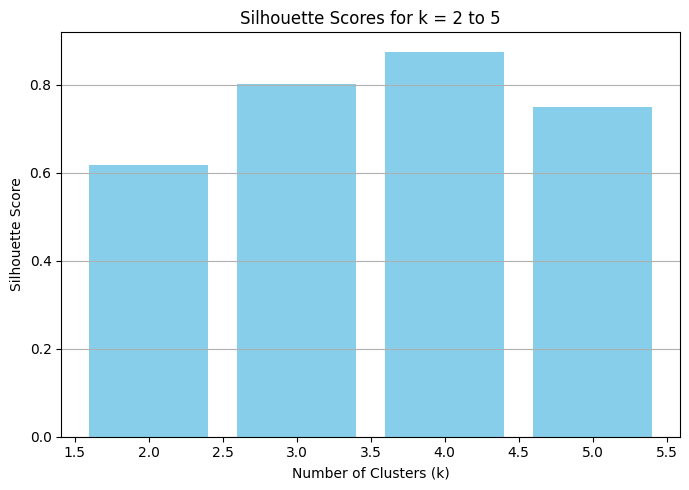

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
scores = []
ks = [2, 3, 4, 5]
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(7, 5))
plt.bar(ks, scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


solution 30:

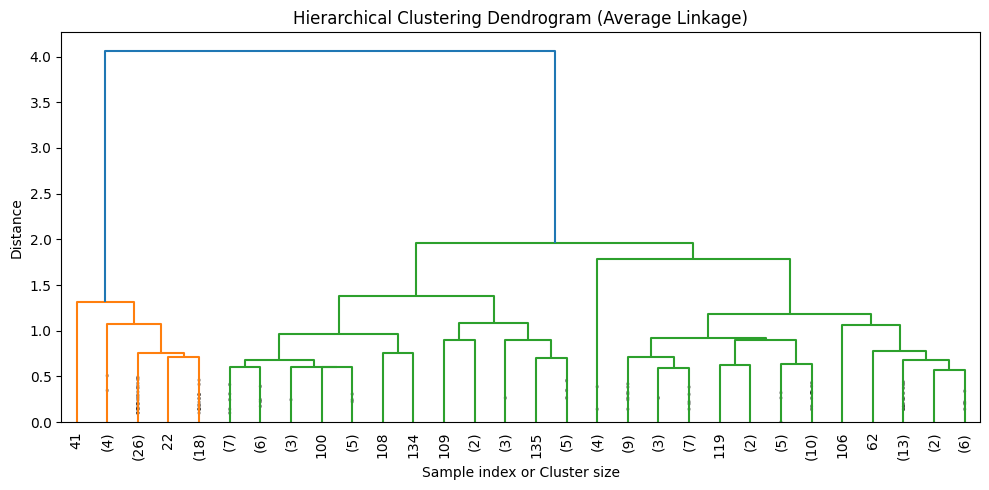

In [11]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using average linkage
linked = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample index or Cluster size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


solution 31 :

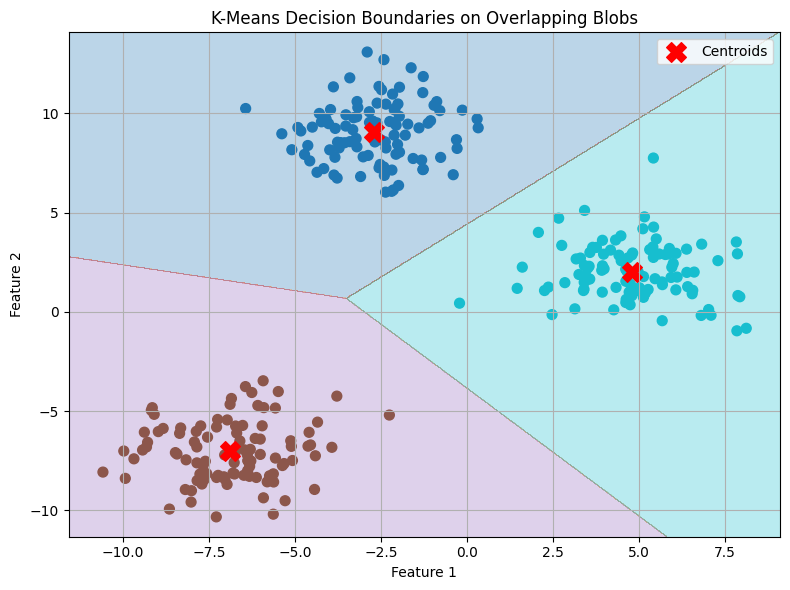

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate overlapping data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plot decision boundaries
h = .02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Decision Boundaries on Overlapping Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


solution 32:

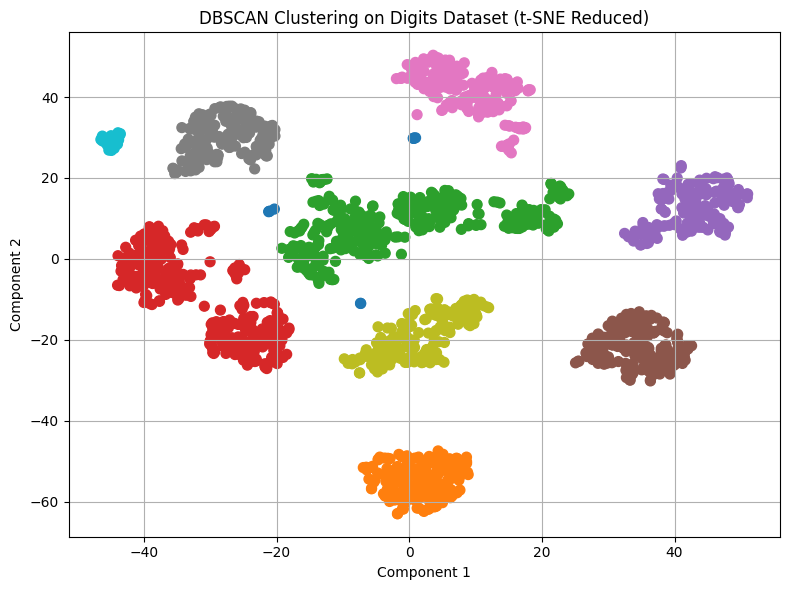

In [13]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load digits data
digits = load_digits()
X = digits.data

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_2d)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 33:

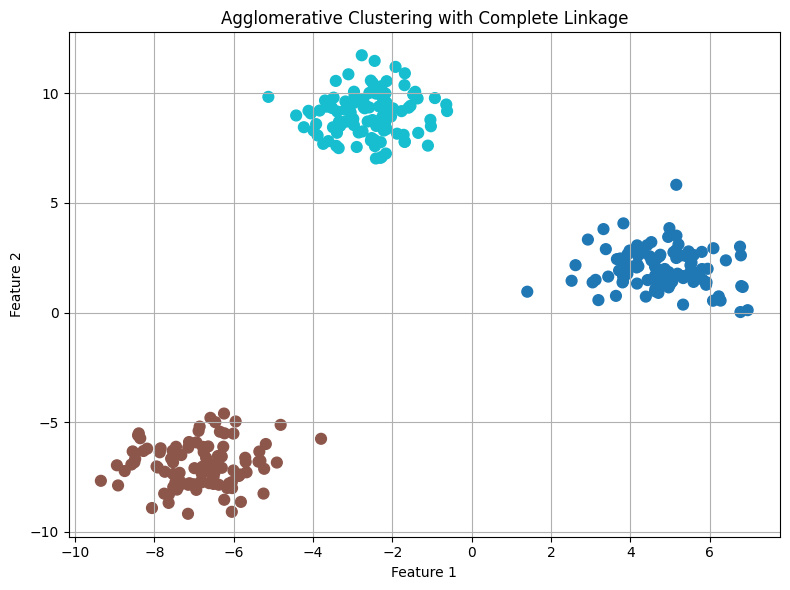

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=60)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 34:

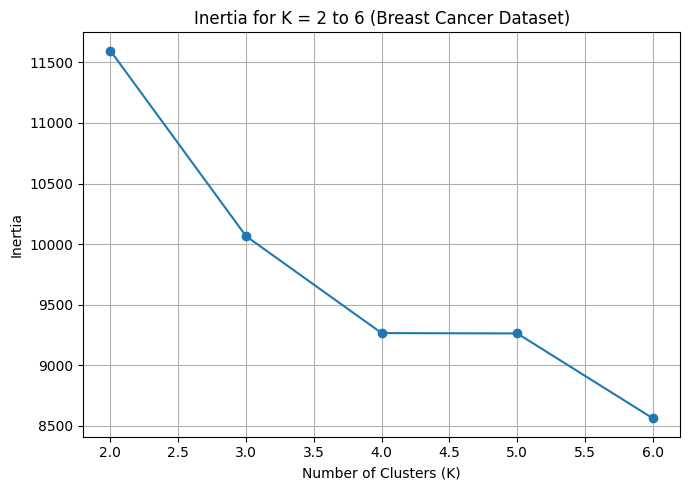

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data and scale
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# Calculate inertia for K = 2 to 6
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(7, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 35:

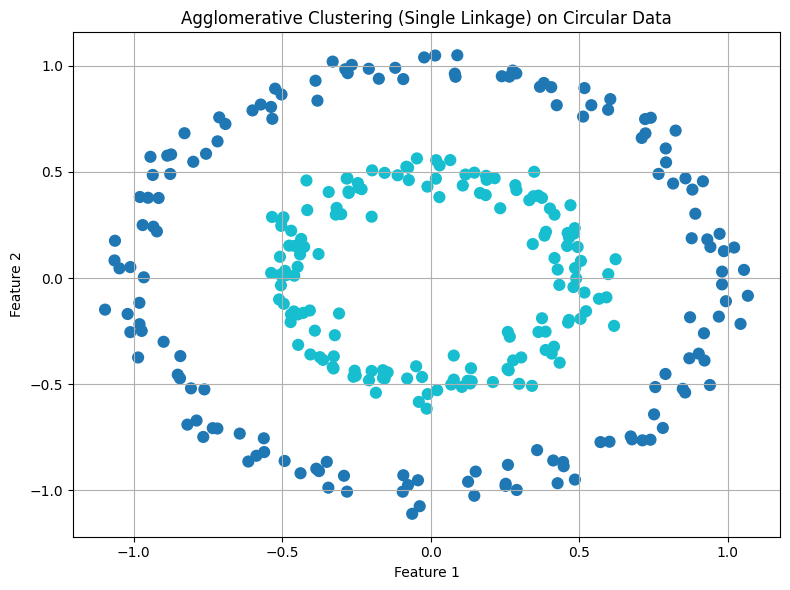

In [16]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate circular data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=60)
plt.title("Agglomerative Clustering (Single Linkage) on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 36:

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters (exclude noise: label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


solution 37:

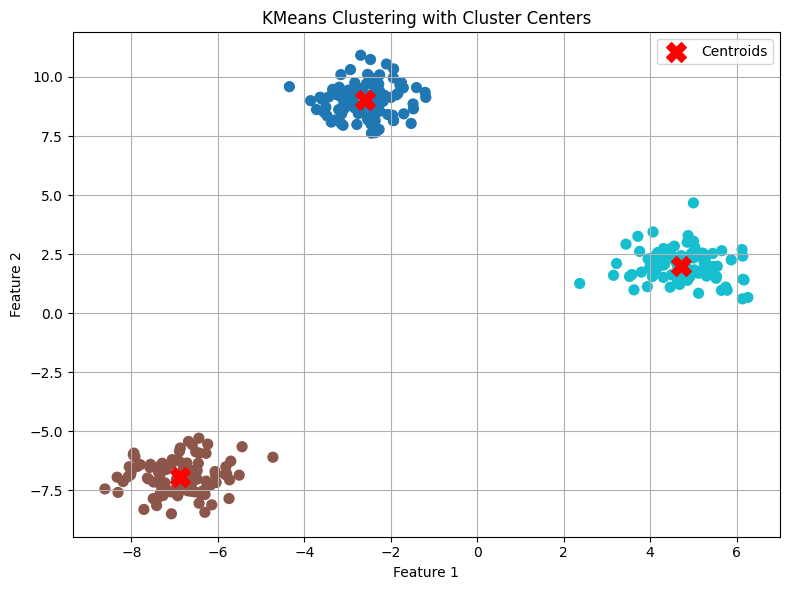

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


solution 38 :

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count noise samples (label == -1)
n_noise = np.sum(labels == -1)
print(f"Number of noise samples in Iris dataset: {n_noise}")


Number of noise samples in Iris dataset: 26


solution 39:

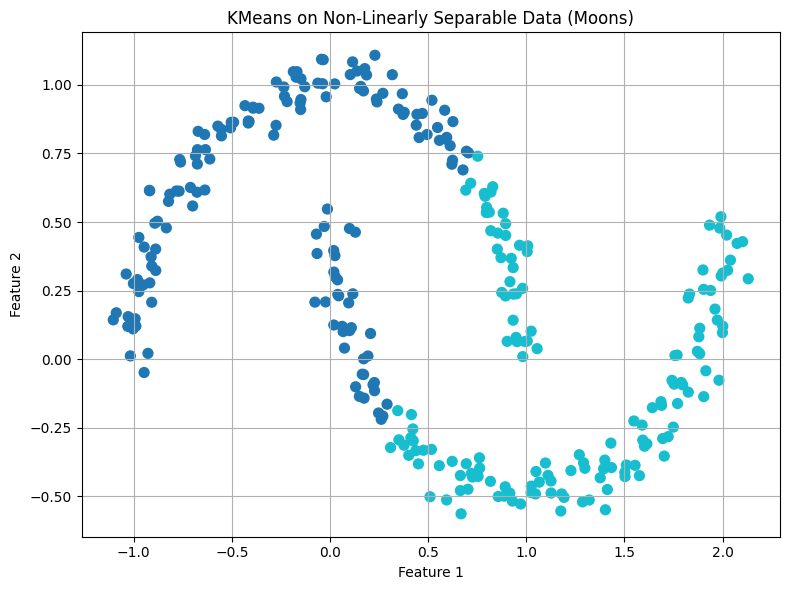

In [20]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linearly separable data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply KMeans (even though data is not linearly separable)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("KMeans on Non-Linearly Separable Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 40 :

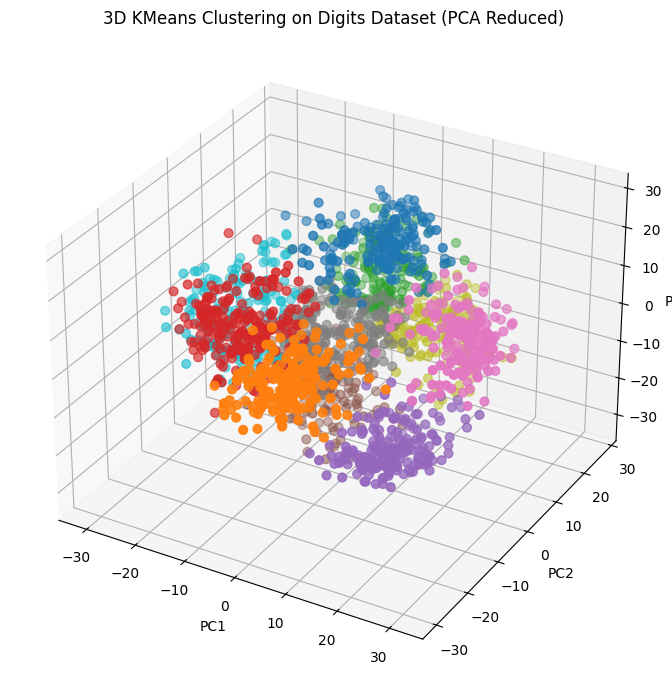

In [21]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
digits = load_digits()
X = digits.data

# Apply PCA (3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=40)
ax.set_title("3D KMeans Clustering on Digits Dataset (PCA Reduced)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()


solution 41:

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for 5-cluster KMeans: {score:.4f}")


Silhouette Score for 5-cluster KMeans: 0.7657


solution 42:

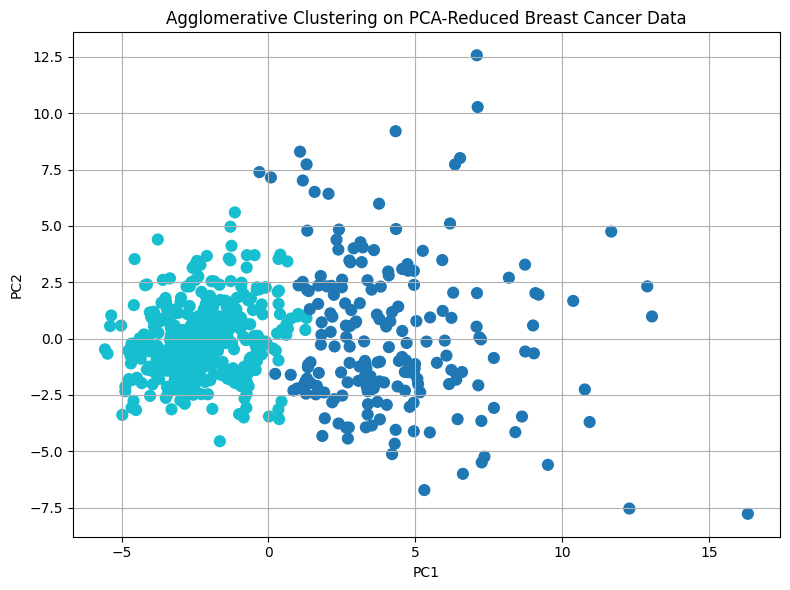

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# Reduce to 2D with PCA
X_pca = PCA(n_components=2).fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=60)
plt.title("Agglomerative Clustering on PCA-Reduced Breast Cancer Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 43:

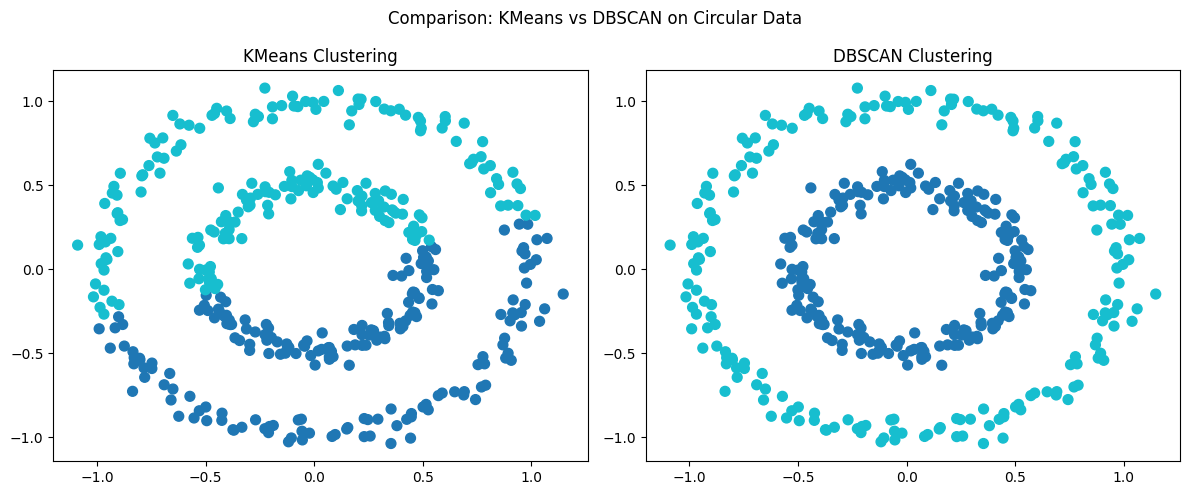

In [24]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate noisy circular data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Apply KMeans and DBSCAN
kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# Plot side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans, cmap='tab10', s=50)
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan, cmap='tab10', s=50)
plt.title("DBSCAN Clustering")

plt.suptitle("Comparison: KMeans vs DBSCAN on Circular Data")
plt.tight_layout()
plt.show()


solution 44:

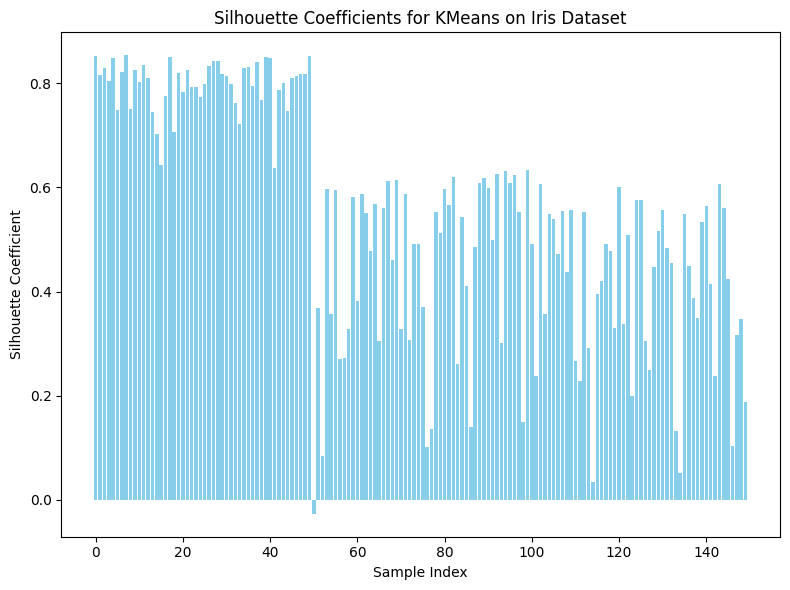

In [25]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette coefficients
silhouette_vals = silhouette_samples(X, labels)

# Plot silhouette coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='skyblue')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficients for KMeans on Iris Dataset")
plt.tight_layout()
plt.show()


solution 45:

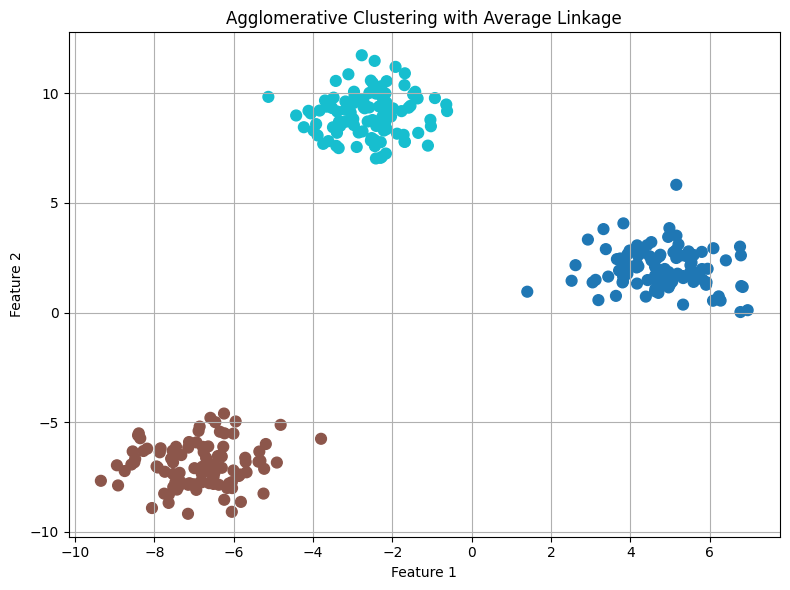

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

#
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with average linkage
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=60)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


solution 46:

/tmp/ipython-input-30-1913375649.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['Cluster'] = labels


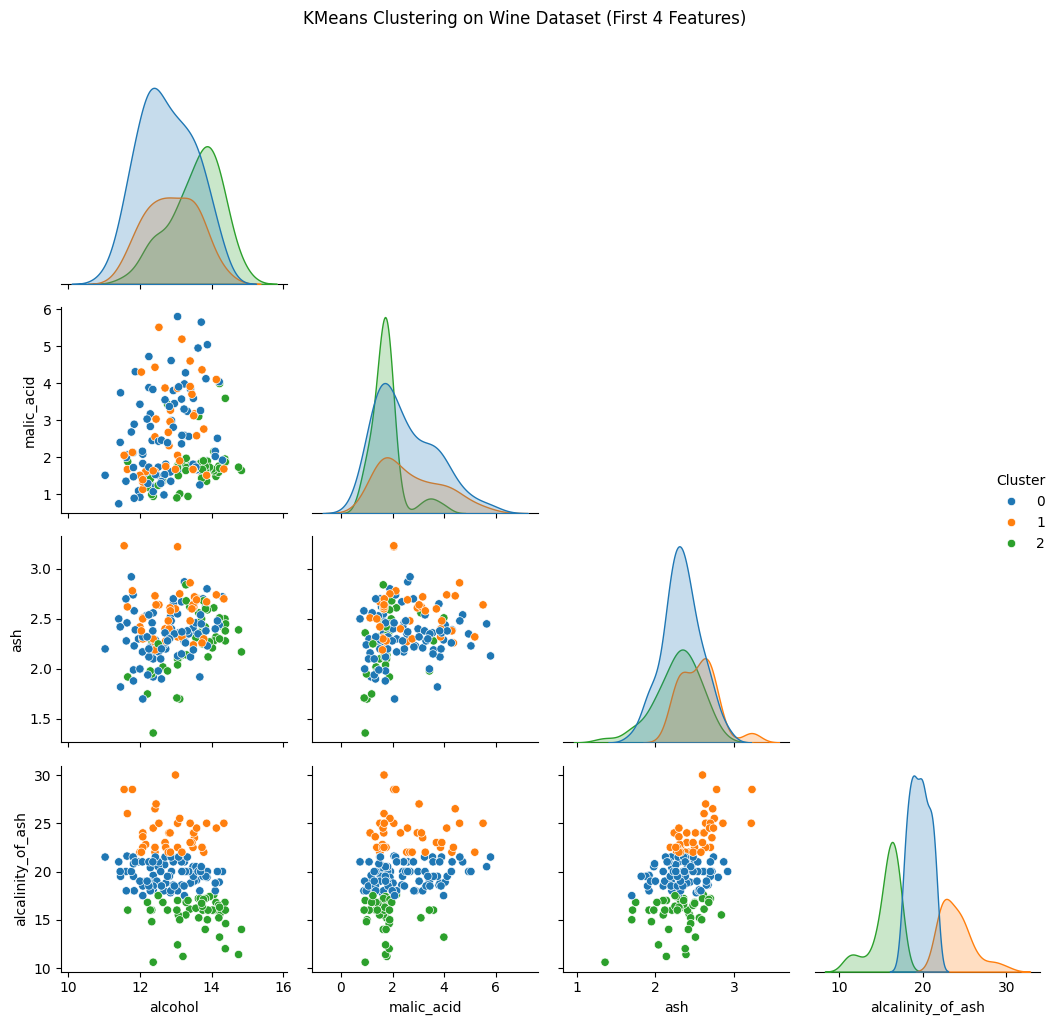

In [30]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Use only first 4 features for visualization
X_subset = X.iloc[:, :4]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_subset)

# Add cluster labels to dataframe
X_subset['Cluster'] = labels

# Visualize with pairplot
sns.pairplot(X_subset, hue='Cluster', palette='tab10', corner=True)
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.tight_layout()
plt.show()


solution 47 :

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

# Add noise
rng = np.random.RandomState(42)
noise = rng.uniform(low=-10, high=10, size=(20, 2))
X_noisy = np.vstack([X, noise])

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X_noisy)

# Count
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters (excluding noise): 3
Number of noise points: 22


solution 48 :

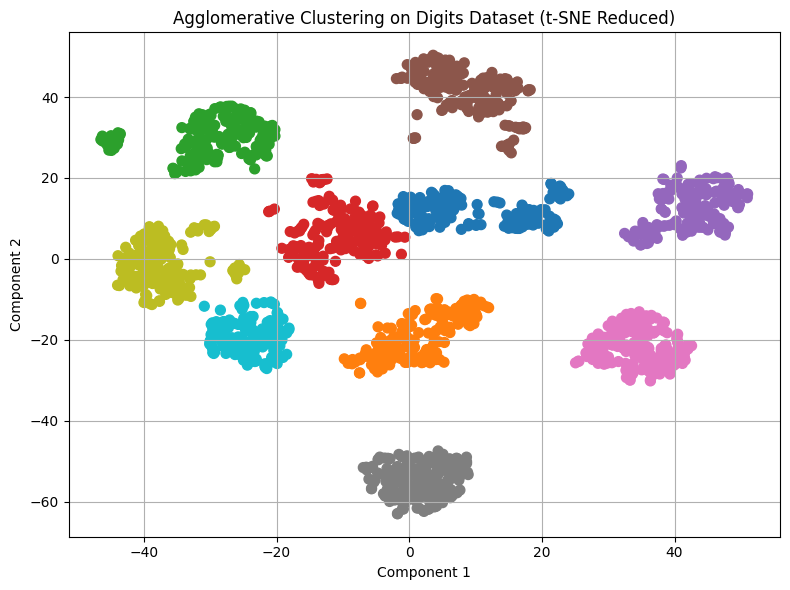

In [32]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_2d)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
